## load the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## load the dataset 

In [2]:
df= pd.read_csv("bikes.csv")
df.head(4)

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0,8,32,40
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0,5,27,32
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0,3,10,13


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 935.6+ KB


In [4]:
df.describe()

,holiday,workingday,temp,humidity,windspeed,casual,registered,rented_bikes_count
count,10030.000000,9388.000000,8104.000000,7462.000000,6820.000000,10886.000000,10886.000000,10886.000000
mean,0.029113,0.678206,20.317665,61.790673,12.708806,36.021955,155.552177,191.574132
std,0.168131,0.467189,7.818568,19.262084,8.131154,49.960477,151.039033,181.144454
min,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,0.000000,1.000000,20.500000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,0.000000,1.000000,26.240000,77.000000,16.997900,49.000000,222.000000,284.000000
max,1.000000,1.000000,41.000000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'rented_bikes_count'],
      dtype='object')

## Bike rentals vs. user type

In [6]:
df[['casual','registered']].describe()

,casual,registered
count,10886.000000,10886.000000
mean,36.021955,155.552177
std,49.960477,151.039033
min,0.000000,0.000000
25%,4.000000,36.000000
50%,17.000000,118.000000
75%,49.000000,222.000000
max,367.000000,886.000000


### We had found here in the relation between casual and registered users that the registered users is more than casual by two times the casual, the value of reg is 886 and the casual is 367 approximately  

##  Season vs Bikes rental

In [7]:
df.head(2)

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0,8,32,40


In [35]:
df["season"].value_counts()

Winter    2688
Fall      2680
Summer    2670
Spring    2634
Name: season, dtype: int64

<AxesSubplot:xlabel='season', ylabel='count'>

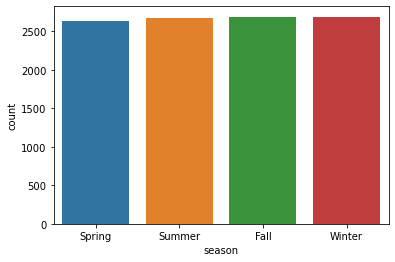

In [34]:
sns.countplot(data= df, x= "season")

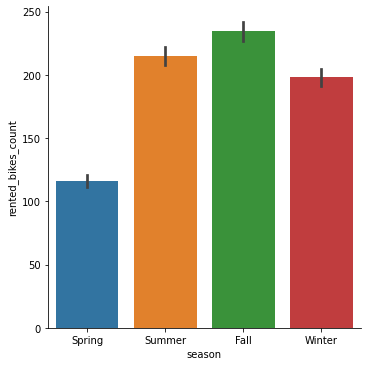

In [39]:
sns.catplot(data=df, kind="bar", x="season", y="rented_bikes_count")

## As we can see the highest rented bikes lie in season Fall the second one season of Summer and the least one is Spring. We can assume the reason behind this behavior is that the summer and fall seasons provides the most suitable climate for bike riding 

## Holiday vs RentedBike 

In [42]:
df['holiday'].value_counts()

0.0    9738
1.0     292
Name: holiday, dtype: int64

<AxesSubplot:xlabel='holiday', ylabel='rented_bikes_count'>

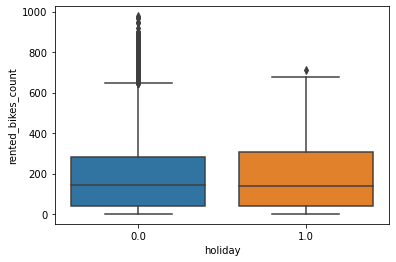

In [48]:
sns.boxplot(data =df, x= 'holiday', y= 'rented_bikes_count')

## we had seen that the distribution of data in the holidays is less than in working days and there is alots of outliers in the part of holidays, Even though there is no huge difference in no. of bike rentals per hour on a holiday and a normal working day, the average bike rentals is less on holiday, Therefore we can assume that there can be regular bike riders who use the rides to get their work places.

## WorkingDay vs RentedBike 

In [50]:
df['workingday'].value_counts()

1.0    6367
0.0    3021
Name: workingday, dtype: int64

<AxesSubplot:xlabel='workingday', ylabel='count'>

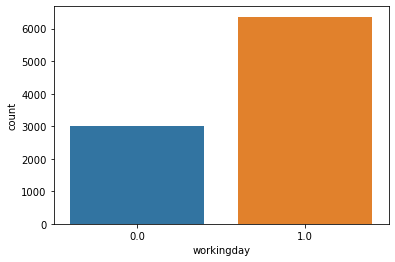

In [52]:
sns.countplot(x= "workingday",data= df)

<AxesSubplot:xlabel='workingday', ylabel='rented_bikes_count'>

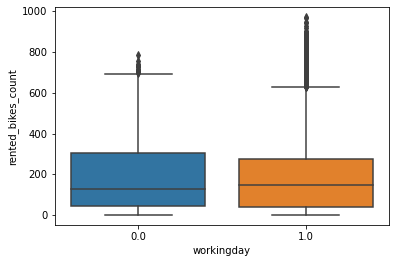

In [55]:
sns.boxplot(x="workingday", y="rented_bikes_count", data=df)

## RentedBike Of Each Season vs WorkingDay 

<AxesSubplot:xlabel='workingday', ylabel='rented_bikes_count'>

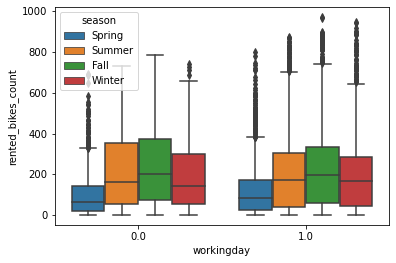

In [59]:
sns.boxplot(y="rented_bikes_count", x="workingday", hue="season",data=df)

## we had seen from this boxplots that summer and fall doesnot have a clear difference in bike rentals in both of working day and not working. winter and spring shows a higher difference in average of bike rented in working day so we can conclude that people who walk in those season prefer go to work with bike.

## BikeRented vs Weather 

In [60]:
df['weather'].value_counts()

Clear    5793
Mist     2259
Rainy     693
Snowy       1
Name: weather, dtype: int64

<AxesSubplot:xlabel='weather', ylabel='rented_bikes_count'>

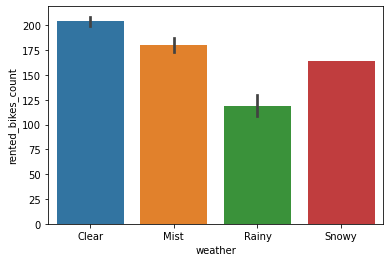

In [67]:
sns.barplot(x="weather", y= "rented_bikes_count", data=df)

## we had seen that the Clear is more in rented bike and  then Mist weather come in second place. since the more accidents can be happen in this bad weather so people rarely to ride bikes in rainy and snowy.

## BikeRented vs Humidity 

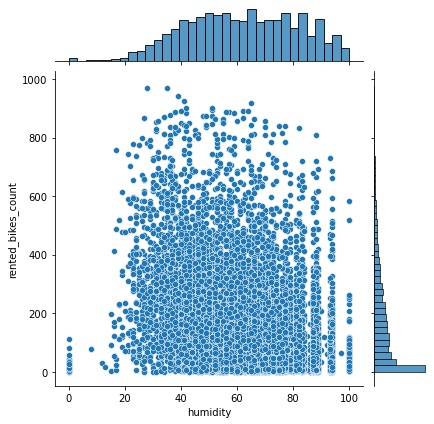

In [73]:
sns.jointplot(x="humidity", y="rented_bikes_count", data=df)

## there is no relation between humidity and RentedBike  

## BikeRented vs WindSpeed 

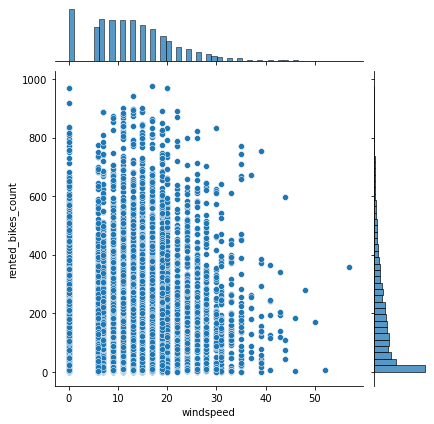

In [74]:
sns.jointplot(x="windspeed", y="rented_bikes_count", data=df)

## There is no relation between windspeed and RentedBike 

##  Create a new feature for Year, month and day

In [79]:
df['Year'] = df['datetime'].apply(lambda y: y.split("-")[-3] )
df['month'] = df['datetime'].apply(lambda m: m.split("-")[-2] )
df.tail(3)

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Year,month,profit
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,2012,12,1316.0
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,2012,12,1190.0
10885,2012-12-19 23:00:00,Winter,0.0,1.0,Clear,13.12,66.0,8.9981,4,84,88,2012,12,644.0


## Analysis on all about date 

In [77]:
df["Year"].value_counts()

2012    5464
2011    5422
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='count'>

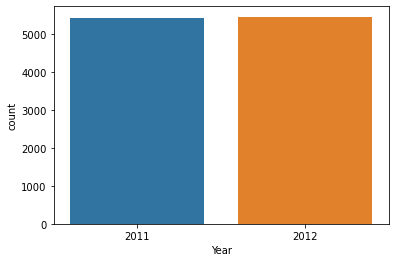

In [87]:
sns.countplot(x= "Year", data=df)

In [85]:
df["month"].value_counts()

07    912
06    912
08    912
12    912
05    912
11    911
10    911
09    909
04    909
03    901
02    901
01    884
Name: month, dtype: int64

<AxesSubplot:xlabel='month', ylabel='count'>

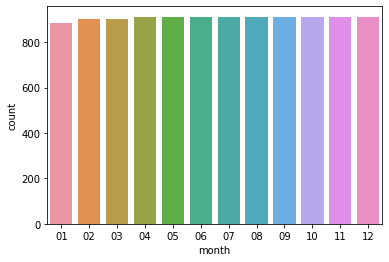

In [84]:
sns.countplot(x= "month", data=df)

## We had seen that all of months is approximately equal to each other. 

##  Add feature for Profit and make analysis with other features

In [102]:
difference= (((df["casual"] * 20) + (df["registered"] * 5))) * 12
df['profit'] = (difference - 1400) * 0.14

In [103]:
df.head(2)

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Year,month,profit
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,2011,01,14.0
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0,8,32,40,2011,01,341.6


<AxesSubplot:xlabel='Year', ylabel='profit'>

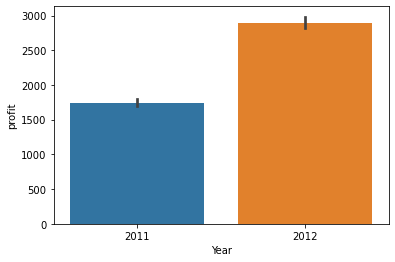

In [101]:
sns.barplot(x="Year", y ="profit", data=df)

## we see that the profit increase in the year of 2012 

<AxesSubplot:xlabel='month', ylabel='profit'>

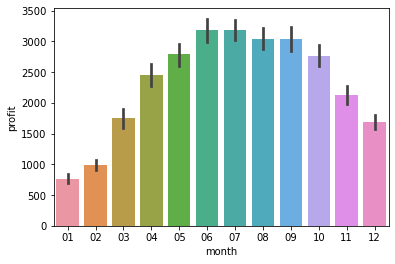

In [104]:
sns.barplot(x="month", y ="profit", data=df)

<AxesSubplot:xlabel='season', ylabel='profit'>

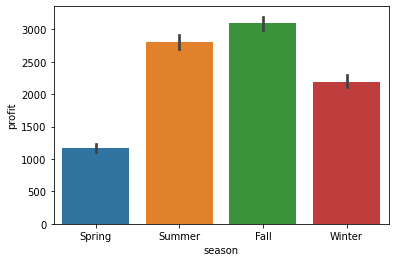

In [105]:
sns.barplot(x="season", y ="profit", data=df)